# Data Analysis with Python


## Objectives
After completing this lab you will be able to:

- Explore features or charecteristics to predict price of car

## Table of Contents
- Import Data
- Analyzing Individual Feature Patterns using Visualization
- Descriptive Statistical Analysis
- Basics of Grouping
- Correlation and Causation
- ANOVA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 1. Import Data

For reading a csv datasets from a GitHub repository:
- Open the GitHub repository page in your web browser.
- Click on the dataset file you want to read from the GitHub repository. A preview of the file will open.
- You will find a "Raw" button to the upper right corner of the file preview. Click on it.
- The file preview will open with a URL like this:  https://raw.githubusercontent.com/insaid......
- Copy this URL and paste in pd.read_csv() to read it.

In [2]:
file_name = 'https://raw.githubusercontent.com/Basharer54/Templates/main/clean_df.csv'
df = pd.read_csv(file_name)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,21,27,13495.0,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,21,27,16500.0,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,19,26,16500.0,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,24,30,13950.0,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500.0,18,22,17450.0,Low,0,1,1,0


## 2. Analyzing Individual Feature Patterns Using Visualization

### How to choose the right visualization method?
When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.


For example, we can calculate the correlation between variables of type "int64" or "float64" using the method "corr":

In [3]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,0.243521,0.245613,-0.182196,0.076328,0.184721,-0.035527,0.036233,-0.082391,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,0.124511,0.126034,-0.114713,0.217034,0.166059,-0.225016,-0.181877,0.133999,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,-0.074380,-0.079330,0.250313,0.368584,-0.217522,-0.470606,-0.543304,0.584642,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,-0.050463,-0.057929,0.159733,0.581018,-0.227380,-0.665192,-0.698142,0.690628,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,-0.004059,-0.009260,0.189867,0.615817,-0.193213,-0.633531,-0.680635,0.751265,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,-0.240217,-0.244270,0.259737,-0.088696,-0.187717,-0.049800,-0.104812,0.135486,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,-0.029485,-0.036691,0.156433,0.756718,-0.188590,-0.749543,-0.794889,0.834415,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,-0.177698,-0.183013,0.028889,0.822255,-0.186924,-0.650546,-0.679571,0.872335,0.070779,-0.070779,-0.110040,0.110040
bore,0.243521,0.124511,-0.074380,-0.050463,-0.004059,-0.240217,-0.029485,-0.177698,1.000000,0.999672,-0.027237,0.031766,0.189485,-0.196827,-0.170635,0.005399,-0.046482,0.046482,0.062876,-0.062876
stroke,0.245613,0.126034,-0.079330,-0.057929,-0.009260,-0.244270,-0.036691,-0.183013,0.999672,1.000000,-0.023685,0.024642,0.189387,-0.188074,-0.161747,-0.001799,-0.042777,0.042777,0.062400,-0.062400


###  Continuous Numerical Variables:
Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.

In order to start understanding the (linear) relationship between an individual variable and the price, we can use `sns.regplot` which plots the scatterplot plus the fitted regression line for the data.

Let's see several examples of different linear relationships:

#### 1. Positive Linear Relationship 
Let's find the scatterplot of "engine-size" and "price".

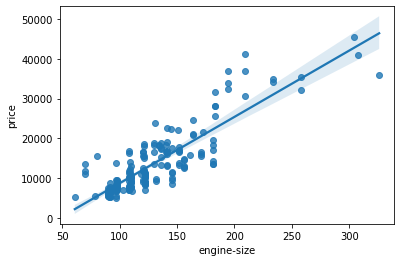

In [4]:
# Engine size as potential predictor variable of price
sns.regplot(x='engine-size', y='price', data=df)
plt.show()

As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

We can examine the correlation between 'engine-size' and 'price' and see that it's approximately 0.87.

In [5]:
df[['engine-size', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


#### 2. Negative Linear Relationship
Highway mpg is a potential predictor variable of price. Let's find the scatterplot of "highway-mpg" and "price".

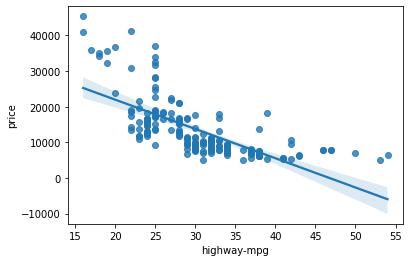

In [6]:
sns.regplot(x='highway-mpg', y='price', data=df)
plt.show()

As highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.

We can examine the correlation between 'highway-mpg' and 'price' and see it's approximately -0.704.

In [7]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


#### 3. Weak Linear Relationship
Let's see if "peak-rpm" is a predictor variable of "price".

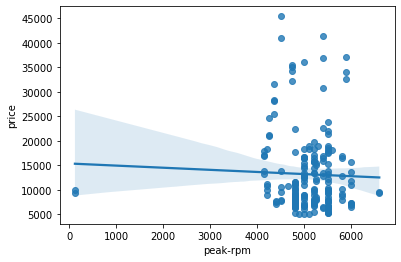

In [8]:
sns.regplot(x='peak-rpm', y='price', data=df)
plt.show()

peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.

We can examine the correlation between 'peak-rpm' and 'price' and see it's approximately -0.101616.

In [9]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.00000,-0.03747
price,-0.03747,1.00000


### Categorical Variables
These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

Let's look at the relationship between "body-style" and "price".

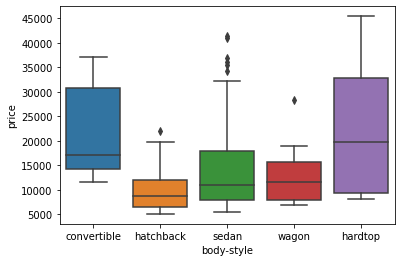

In [10]:
sns.boxplot(x='body-style', y='price', data=df)
plt.show()

We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price":

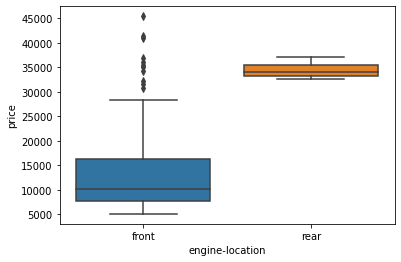

In [11]:
sns.boxplot(x='engine-location', y='price', data=df)
plt.show()

Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

Let's examine "drive-wheels" and "price".

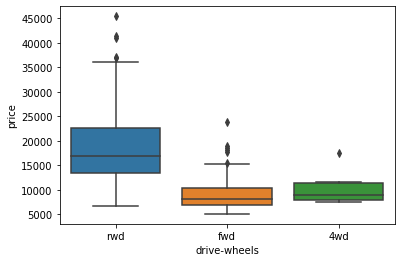

In [12]:
sns.boxplot(x='drive-wheels', y='price', data=df)
plt.show()

Here we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.

## 3. Descriptive Statistical Analysis

Let's first take a look at the variables by utilizing a description method.

The describe function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

This will show:

- the count of that variable
- the mean
- the standard deviation (std)
- the minimum value
- the IQR (Interquartile Range: 25%, 50% and 75%)
- the maximum value


We can apply the method "describe" as follows:

In [13]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,5.692289,5.619950,10.164279,103.582090,5067.880597,25.179104,30.686567,13207.129353,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,16.616706,16.627881,4.004965,37.411422,689.686904,6.423220,6.815150,7947.066342,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,122.000000,13.000000,16.000000,5118.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,24.000000,30.000000,10295.000000,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.600000,3.460000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,122.000000,122.000000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,1.000000,1.000000,1.000000,1.000000


The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows:

In [14]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,115,94,118,198,145,157,92,151


#### Value Counts
Value counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column "drive-wheels". Don’t forget the method "value_counts" only works on pandas series, not pandas dataframes. As a result, we only include one bracket df['drive-wheels'], not two brackets df[['drive-wheels']].

In [15]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

We can convert the series to a dataframe as follows:

In [16]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


Let's repeat the above steps but save the results to the dataframe "drive_wheels_counts" and rename the column 'drive-wheels' to 'value_counts' and rename the index to 'drive-wheels':

In [17]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


We can repeat the above process for the variable 'engine-location'.

In [18]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,value_counts
engine-location,
front,198
rear,3


After examining the value counts of the engine location, we see that engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, so this result is skewed. Thus, we are not able to draw any conclusions about the engine location.

#### 4. Basics of Grouping

The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.

For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.

In [19]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.

We can select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_group_one".

In [20]:
df_group_one = df[['drive-wheels','body-style','price']]

We can then calculate the average price for each of the different categories of data.

In [21]:
# grouping results
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

You can also group by multiple variables. For example, let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combination of 'drive-wheels' and 'body-style'. We can store the results in the variable 'grouped_test1'.

In [22]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot" to create a pivot table from the groups.

In this case, we will leave the drive-wheels variable as the rows of the table, and pivot body-style to become the columns of the table:

In [23]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well. It should be mentioned that missing data is quite a complex subject and is an entire course on its own.

In [24]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

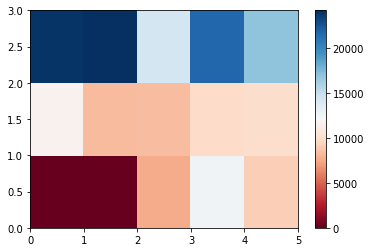

In [25]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' on the vertical and horizontal axis, respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.

The default labels convey no useful information to us. Let's change that:

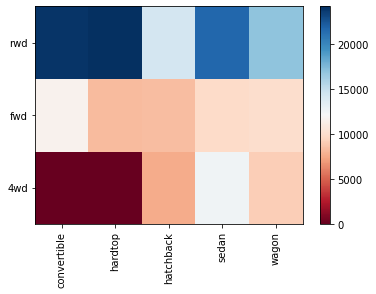

In [26]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

Visualization is very important in data science, and Python visualization packages provide great freedom. We will go more in-depth in a separate Python visualizations course.

The main question we want to answer in this module is, "What are the main characteristics which have the most impact on the car price?".

To get a better measure of the important characteristics, we look at the correlation of these variables with the car price. In other words: how is the car price dependent on this variable?

#### 5. Correlation and Causation
Correlation: a measure of the extent of interdependence between variables.

Causation: the relationship between cause and effect between two variables.

It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler the determining causation as causation may require independent experimentation.

Pearson Correlation

The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

- 1: Perfect positive linear correlation.
- 0: No linear correlation, the two variables most likely do not affect each other.
- -1: Perfect negative linear correlation.
Pearson Correlation is the default method of the function "corr". Like before, we can calculate the Pearson Correlation of the of the 'int64' or 'float64' variables.

In [27]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,0.243521,0.245613,-0.182196,0.076328,0.184721,-0.035527,0.036233,-0.082391,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,0.124511,0.126034,-0.114713,0.217034,0.166059,-0.225016,-0.181877,0.133999,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,-0.074380,-0.079330,0.250313,0.368584,-0.217522,-0.470606,-0.543304,0.584642,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,-0.050463,-0.057929,0.159733,0.581018,-0.227380,-0.665192,-0.698142,0.690628,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,-0.004059,-0.009260,0.189867,0.615817,-0.193213,-0.633531,-0.680635,0.751265,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,-0.240217,-0.244270,0.259737,-0.088696,-0.187717,-0.049800,-0.104812,0.135486,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,-0.029485,-0.036691,0.156433,0.756718,-0.188590,-0.749543,-0.794889,0.834415,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,-0.177698,-0.183013,0.028889,0.822255,-0.186924,-0.650546,-0.679571,0.872335,0.070779,-0.070779,-0.110040,0.110040
bore,0.243521,0.124511,-0.074380,-0.050463,-0.004059,-0.240217,-0.029485,-0.177698,1.000000,0.999672,-0.027237,0.031766,0.189485,-0.196827,-0.170635,0.005399,-0.046482,0.046482,0.062876,-0.062876
stroke,0.245613,0.126034,-0.079330,-0.057929,-0.009260,-0.244270,-0.036691,-0.183013,0.999672,1.000000,-0.023685,0.024642,0.189387,-0.188074,-0.161747,-0.001799,-0.042777,0.042777,0.062400,-0.062400


Sometimes we would like to know the significant of the correlation estimate.

P-value

What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the

- p-value is  <  0.001: we say there is strong evidence that the correlation is significant.
- the p-value is  <  0.05: there is moderate evidence that the correlation is significant.
- the p-value is  <  0.1: there is weak evidence that the correlation is significant.
- the p-value is  >  0.1: there is no evidence that the correlation is significant.
We can obtain this information using "stats" module in the "scipy" library.

In [28]:
for col in df[['wheel-base', 'horsepower', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'city-mpg', 'highway-mpg',]]:
    pearson_coef, p_value = stats.pearsonr(df[col], df['price'])
    print(f'{col}  coef= {pearson_coef}    p={p_value}')

wheel-base  coef= 0.584641822265508    p=8.076488270733218e-20
horsepower  coef= 0.806429390457692    p=2.7444670418335615e-47
length  coef= 0.6906283804483639    p=8.016477466159328e-30
width  coef= 0.7512653440522675    p=9.200335510481123e-38
curb-weight  coef= 0.8344145257702843    p=2.189577238894065e-53
engine-size  coef= 0.8723351674455185    p=9.265491622198389e-64
bore  coef= 0.005399275177997419    p=0.9393625495207799
city-mpg  coef= -0.6865710067844678    p=2.321132065567641e-29
highway-mpg  coef= -0.704692265058953    p=1.7495471144476358e-31


##### Conclusions:

`wheel-base vs. price` Since the p-value is  <  0.001, the correlation is statistically significant, although the linear relationship isn't extremely strong (~0.585).

`Horsepower vs. Price` Since the p-value is < 0.001, the correlation is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).

`Length vs. Price` Since the p-value is < 0.001, the correlation statistically significant, and the linear relationship is moderately strong (~0.691).

`Width vs. Price` Since the p-value is < 0.001, the correlation is statistically significant, and the linear relationship is quite strong (~0.751).

`Curb-Weight vs. Price` Since the p-value is < 0.001, the correlation is statistically significant, and the linear relationship is quite strong (~0.834).

`Engine-Size vs. Price` Since the p-value is  <  0.001, the correlation is statistically significant, and the linear relationship is very strong (~0.872).

`City-mpg vs. Price` Since the p-value is  <  0.001, the correlation is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderately strong.

`Highway-mpg vs. Price` Since the p-value is < 0.001, the correlation is statistically significant, and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.

#### 6. ANOVA

##### ANOVA: Analysis of Variance
The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

P-value: P-value tells how statistically significant our calculated score value is.

If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.


##### Drive Wheels
Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.

To see if different types of 'drive-wheels' impact 'price', we group the data.

In [29]:
groubed_wheels = df[['drive-wheels','price']].groupby(['drive-wheels'])
groubed_wheels.head()

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
6,fwd,17710.0
7,fwd,18920.0
8,fwd,23875.0
9,rwd,16430.0


In [30]:
f_val, p_val = stats.f_oneway(groubed_wheels.get_group('fwd')['price'],
                              groubed_wheels.get_group('rwd')['price'],
                              groubed_wheels.get_group('4wd')['price'])
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?

Let's examine them separately.

#### fwd and rwd

In [31]:
f_val, p_val = stats.f_oneway(groubed_wheels.get_group('fwd')['price'], groubed_wheels.get_group('rwd')['price'])  
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


#### 4wd and rwd

In [32]:
f_val, p_val = stats.f_oneway(groubed_wheels.get_group('4wd')['price'], groubed_wheels.get_group('rwd')['price'])  
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


#### 4wd and fwd

In [33]:
f_val, p_val = stats.f_oneway(groubed_wheels.get_group('4wd')['price'], groubed_wheels.get_group('fwd')['price'])  
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


## Conclusion: Important Variables
We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

### Continuous numerical variables:

- Length
- Width
- Curb-weight
- Engine-size
- Horsepower
- City-mpg
- Highway-mpg
- Wheel-base
- Bore

### Categorical variables:

- Drive-wheels

As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.